# NASS Analysis Sandbox - Development & Testing Environment

**Purpose:** Sandbox environment for developing and testing extensions to the main Analysis_NASS.ipynb pipeline before integration.

**Main Notebook Reference:** `Analysis_NASS.ipynb` (same directory)

**Author:** Development testing for Seena Khosravi, MD  
**Created:** For extension development and testing  

---

## Important Notes

- This sandbox references the main `Analysis_NASS.ipynb` notebook structure
- All new code developed here should be tested before integration
- Environment setup mirrors the main notebook for compatibility
- Data processing assumes the main notebook preprocessing pipeline

---

# 1. Environment Verification

Verify R and Python environments match the main notebook setup, load required packages, and test rpy2 integration.

## Environment Setup Verification

Check that our environment matches the main Analysis_NASS.ipynb setup.

In [7]:
# Verify environment matches main notebook setup
import sys
import os
import subprocess
from pathlib import Path

print("=== SANDBOX ENVIRONMENT VERIFICATION ===")
print(f"Python version: {sys.version}")
print(f"Working directory: {os.getcwd()}")

# Check if we're in the same environment as main notebook
main_notebook_path = Path("Analysis_NASS.ipynb")
if main_notebook_path.exists():
    print(f"✅ Main notebook found: {main_notebook_path.absolute()}")
else:
    print(f"⚠️  Main notebook not found in current directory")
    print(f"   Expected: {main_notebook_path.absolute()}")

# Verify key packages from main notebook
required_packages = ['pandas', 'requests', 'rpy2']
missing_packages = []

for pkg in required_packages:
    try:
        __import__(pkg)
        print(f"✅ {pkg} available")
    except ImportError:
        missing_packages.append(pkg)
        print(f"❌ {pkg} missing")

if missing_packages:
    print(f"\n⚠️  Missing packages: {missing_packages}")
    print("   Run the environment setup from main notebook first")
else:
    print("\n✅ All required packages available")

=== SANDBOX ENVIRONMENT VERIFICATION ===
Python version: 3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]
Working directory: c:\Users\laure\Documents\GitHub\NASS
✅ Main notebook found: c:\Users\laure\Documents\GitHub\NASS\Analysis_NASS.ipynb
✅ pandas available
✅ requests available
✅ rpy2 available

✅ All required packages available


## R Integration Testing

Test rpy2 integration and R package availability.

In [8]:
# Test R integration
try:
    %load_ext rpy2.ipython
    print("✅ R integration loaded successfully")
    R_AVAILABLE = True
except Exception as e:
    print(f"❌ R integration failed: {e}")
    R_AVAILABLE = False

# Store R availability for later cells
globals()['R_AVAILABLE'] = R_AVAILABLE

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
✅ R integration loaded successfully


In [9]:
%%R

# Test R environment and core packages
cat("=== R ENVIRONMENT VERIFICATION ===\n")
cat("R version:", R.version.string, "\n")

# Test essential packages from main notebook
essential_packages <- c("data.table", "ggplot2", "scales")
missing_r_packages <- c()

for(pkg in essential_packages) {
  if(require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("✅", pkg, "loaded\n")
  } else {
    cat("❌", pkg, "missing\n")
    missing_r_packages <- c(missing_r_packages, pkg)
  }
}

if(length(missing_r_packages) > 0) {
  cat("\n⚠️  Missing R packages:", paste(missing_r_packages, collapse = ", "), "\n")
  cat("   Install these packages before proceeding\n")
} else {
  cat("\n✅ All essential R packages available\n")
}

# Test data.table threading (performance check)
if(require("data.table", quietly = TRUE)) {
  setDTthreads(0)  # Use all cores
  cat("data.table threads:", getDTthreads(), "\n")
}

=== R ENVIRONMENT VERIFICATION ===
R version: R version 4.4.0 (2024-04-24 ucrt) 
R version: R version 4.4.0 (2024-04-24 ucrt) 
<U+2705> data.table loaded
<U+2705> data.table loaded
<U+2705> ggplot2 loaded
<U+2705> scales loaded

<U+2705> All essential R packages available
data.table threads: <U+2705> ggplot2 loaded
<U+2705> scales loaded

<U+2705> All essential R packages available
data.table threads: 8 
8 


data.table 1.17.8 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com
In addition: Warning messages:
1: package 'data.table' was built under R version 4.4.3 
2: package 'ggplot2' was built under R version 4.4.3 
3: package 'scales' was built under R version 4.4.3 


# 2. Data Import from Main Notebook

Import the processed NASS dataset and verify data structure matches expectations from the main analysis pipeline.

## Data Loading Strategy

Since this is a sandbox, we'll implement multiple data loading strategies to work with the main notebook's processed data.

In [10]:
# Data loading for sandbox - multiple strategies
import pandas as pd
import pickle
from pathlib import Path

class SandboxDataLoader:
    def __init__(self):
        self.data_sources = {
            'memory': 'From Python globals (if main notebook ran)',
            'cleaned_csv': 'From main notebook cleaned CSV file',
            'pickle': 'From saved pickle file',
            'fresh': 'Fresh download (GitHub simulated data)'
        }
        self.nass_data = None
        
    def load_from_memory(self):
        """Try to load from Python globals if main notebook was run"""
        try:
            if 'df' in globals():
                self.nass_data = globals()['df'].copy()
                return True
            return False
        except:
            return False
    
    def load_from_cleaned_csv(self):
        """Load from main notebook's cleaned CSV file"""
        # Try multiple potential paths for the cleaned data
        potential_paths = [
            Path(r'C:\Users\laure\data\nass_data_cleaned.csv'),  # Main notebook path
            Path('data/nass_data_cleaned.csv'),  # Relative path
            Path('../data/nass_data_cleaned.csv'),  # Parent directory
            Path('nass_data_cleaned.csv')  # Current directory
        ]
        
        for csv_path in potential_paths:
            try:
                if csv_path.exists():
                    print(f"   Found cleaned data at: {csv_path}")
                    self.nass_data = pd.read_csv(csv_path)
                    return True
            except Exception as e:
                print(f"   Failed to load from {csv_path}: {e}")
                continue
        return False
    
    def load_from_pickle(self):
        """Load from pickle file if main notebook saved it"""
        pickle_path = Path('nass_processed.pkl')
        try:
            if pickle_path.exists():
                with open(pickle_path, 'rb') as f:
                    self.nass_data = pickle.load(f)
                return True
            return False
        except:
            return False
    
    def load_fresh_data(self):
        """Load fresh simulated data from GitHub"""
        try:
            import requests
            github_url = "https://github.com/SeenaKhosravi/NASS/releases/download/v1.0.0/nass_2020_simulated.csv"
            response = requests.get(github_url, timeout=60)
            response.raise_for_status()
            
            # Save temporarily
            temp_path = Path('temp_nass_data.csv')
            temp_path.write_bytes(response.content)
            
            self.nass_data = pd.read_csv(temp_path)
            temp_path.unlink()  # Clean up
            return True
        except:
            return False
    
    def auto_load(self):
        """Try loading strategies in order of preference"""
        strategies = [
            ('memory', self.load_from_memory),
            ('cleaned_csv', self.load_from_cleaned_csv),
            ('pickle', self.load_from_pickle),
            ('fresh', self.load_fresh_data)
        ]
        
        for strategy_name, strategy_func in strategies:
            print(f"Trying {strategy_name} loading...")
            if strategy_func():
                print(f"✅ Data loaded via {strategy_name}")
                print(f"   Shape: {self.nass_data.shape}")
                return strategy_name
            else:
                print(f"❌ {strategy_name} loading failed")
        
        raise RuntimeError("All data loading strategies failed")

# Load data
loader = SandboxDataLoader()
try:
    load_method = loader.auto_load()
    df_sandbox = loader.nass_data
    print(f"\n✅ Sandbox data ready: {df_sandbox.shape}")
    
    # Verify this is the cleaned data from main notebook
    if 'AGE_GROUP' in df_sandbox.columns and 'INCOME_LEVEL' in df_sandbox.columns:
        print("✅ Detected main notebook preprocessed data with analytical variables")
        print(f"   AGE_GROUP categories: {df_sandbox['AGE_GROUP'].value_counts().to_dict()}")
        print(f"   INCOME_LEVEL categories: {df_sandbox['INCOME_LEVEL'].value_counts().to_dict()}")
    
except Exception as e:
    print(f"❌ Data loading failed: {e}")
    df_sandbox = None

Trying memory loading...
❌ memory loading failed
Trying cleaned_csv loading...
   Found cleaned data at: C:\Users\laure\data\nass_data_cleaned.csv
✅ Data loaded via cleaned_csv
   Shape: (139233, 78)

✅ Sandbox data ready: (139233, 78)
✅ Detected main notebook preprocessed data with analytical variables
   AGE_GROUP categories: {'45-64': 47582, '65+': 46128, '30-44': 22329, '0-17': 12188, '18-29': 11006}
   INCOME_LEVEL categories: {'Q2': 39311, 'Q3': 34833, 'Q1-Lowest': 31913, 'Q4-Highest': 31625, 'Unknown': 1551}
✅ Data loaded via cleaned_csv
   Shape: (139233, 78)

✅ Sandbox data ready: (139233, 78)
✅ Detected main notebook preprocessed data with analytical variables
   AGE_GROUP categories: {'45-64': 47582, '65+': 46128, '30-44': 22329, '0-17': 12188, '18-29': 11006}
   INCOME_LEVEL categories: {'Q2': 39311, 'Q3': 34833, 'Q1-Lowest': 31913, 'Q4-Highest': 31625, 'Unknown': 1551}


## Data Structure Verification

Verify the loaded data matches the expected structure from the main notebook.

In [11]:
# Verify data structure matches main notebook expectations
if df_sandbox is not None:
    print("=== DATA STRUCTURE VERIFICATION ===")
    
    # Expected columns from main notebook processing
    expected_columns = [
        'AGE', 'FEMALE', 'RACE', 'WHITE', 'ZIPINC_QRTL', 'PAY1',
        'CPTCCS1', 'HOSP_LOCATION', 'HOSP_TEACH', 'HOSP_REGION',
        'DISCWT', 'AGE_GROUP', 'INCOME_LEVEL'
    ]
    
    # Check which expected columns are present
    present_columns = [col for col in expected_columns if col in df_sandbox.columns]
    missing_columns = [col for col in expected_columns if col not in df_sandbox.columns]
    
    print(f"Present columns: {len(present_columns)}/{len(expected_columns)}")
    print(f"✅ Found: {present_columns}")
    
    if missing_columns:
        print(f"❌ Missing: {missing_columns}")
        print("   May need to create these variables")
    
    # Basic data quality checks
    print(f"\nData Quality:")
    print(f"  Total rows: {len(df_sandbox):,}")
    print(f"  Total columns: {len(df_sandbox.columns)}")
    print(f"  Memory usage: {df_sandbox.memory_usage(deep=True).sum() / 1e6:.1f} MB")
    
    # Check for key variables
    if 'WHITE' in df_sandbox.columns:
        white_prop = df_sandbox['WHITE'].mean()
        print(f"  White proportion: {white_prop:.3f}")
    
    if 'AGE' in df_sandbox.columns:
        age_stats = df_sandbox['AGE'].describe()
        print(f"  Age range: {age_stats['min']:.0f} - {age_stats['max']:.0f}")
        
else:
    print("❌ No data available for verification")

=== DATA STRUCTURE VERIFICATION ===
Present columns: 13/13
✅ Found: ['AGE', 'FEMALE', 'RACE', 'WHITE', 'ZIPINC_QRTL', 'PAY1', 'CPTCCS1', 'HOSP_LOCATION', 'HOSP_TEACH', 'HOSP_REGION', 'DISCWT', 'AGE_GROUP', 'INCOME_LEVEL']

Data Quality:
  Total rows: 139,233
  Total columns: 78
  Memory usage: 218.1 MB
  White proportion: 0.721
  Age range: 0 - 104
  Memory usage: 218.1 MB
  White proportion: 0.721
  Age range: 0 - 104


## Transfer to R Environment

Transfer the verified data to R for advanced analysis.

In [12]:
# Transfer data to R environment
if df_sandbox is not None and R_AVAILABLE:
    print("Transferring data to R environment...")
    
    # Ensure data types are R-compatible (same as main notebook)
    df_r_ready = df_sandbox.copy()
    
    # Convert object columns to strings
    object_columns = df_r_ready.select_dtypes(include=['object']).columns
    for col in object_columns:
        df_r_ready[col] = df_r_ready[col].astype(str)
    
    # Handle NaN values
    df_r_ready = df_r_ready.fillna('')
    
    print(f"✅ Data prepared for R transfer: {df_r_ready.shape}")
else:
    print("❌ Cannot transfer to R - data or R not available")

Transferring data to R environment...
✅ Data prepared for R transfer: (139233, 78)
✅ Data prepared for R transfer: (139233, 78)


In [13]:
%%R -i df_r_ready

# Convert to data.table for R analysis
if(exists("df_r_ready")) {
  NASS_SANDBOX <- as.data.table(df_r_ready)
  
  # Apply R data types (matching main notebook)
  factor_vars <- c("ZIPINC_QRTL", "PAY1", "CPTCCS1", "HOSP_LOCATION",
                   "HOSP_TEACH", "HOSP_REGION", "RACE")
  existing_factors <- factor_vars[factor_vars %in% names(NASS_SANDBOX)]
  
  if(length(existing_factors) > 0) {
    NASS_SANDBOX[, (existing_factors) := lapply(.SD, as.factor), .SDcols = existing_factors]
  }
  
  # Boolean variables
  if("FEMALE" %in% names(NASS_SANDBOX)) {
    NASS_SANDBOX[, FEMALE := as.logical(as.numeric(FEMALE))]
  }
  if("WHITE" %in% names(NASS_SANDBOX)) {
    NASS_SANDBOX[, WHITE := as.logical(as.numeric(WHITE))]
  }
  
  cat("✅ R data ready: NASS_SANDBOX\n")
  cat("   Rows:", nrow(NASS_SANDBOX), "\n")
  cat("   Cols:", ncol(NASS_SANDBOX), "\n")
  cat("   Factors:", length(existing_factors), "\n")
  
} else {
  cat("❌ df_r_ready not found - cannot create NASS_SANDBOX\n")
}

<U+2705> R data ready: NASS_SANDBOX
   Rows: 139233 
   Cols: 78 
   Factors: 7 
   Rows: 139233 
   Cols: 78 
   Factors: 7 


# 3. Extended Statistical Analysis

Develop advanced statistical models including multilevel regression, survey-weighted analyses, and demographic stratification methods.

## Advanced Statistical Packages Installation

Install and load packages for advanced statistical modeling.

In [14]:
%%R

# Install advanced statistical packages
advanced_packages <- c(
  "lme4",          # Mixed-effects models
  "survey",        # Survey statistics
  "broom",         # Model tidying
  "broom.mixed",   # Mixed model tidying
  "ggeffects",     # Effect plots
  "sjPlot",        # Statistical plots
  "performance",   # Model performance
  "marginaleffects" # Marginal effects
)

cat("Installing advanced statistical packages...\n")

for(pkg in advanced_packages) {
  if(!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    tryCatch({
      install.packages(pkg, quiet = TRUE, dependencies = TRUE)
      library(pkg, character.only = TRUE, quietly = TRUE)
      cat("✅", pkg, "installed and loaded\n")
    }, error = function(e) {
      cat("❌", pkg, "installation failed:", e$message, "\n")
    })
  } else {
    cat("✅", pkg, "already available\n")
  }
}

cat("\nAdvanced packages setup complete\n")

Installing advanced statistical packages...
<U+2705> lme4 already available
<U+2705> lme4 already available
<U+2705> survey already available
<U+2705> survey already available
<U+2705> broom already available
<U+2705> broom already available
<U+2705> broom.mixed already available
<U+2705> broom.mixed already available
<U+2705> ggeffects already available
<U+2705> ggeffects already available
<U+2705> sjPlot already available
<U+2705> <U+2705> sjPlot already available
<U+2705> performance already available
performance already available
<U+2705> marginaleffects already available

Advanced packages setup complete
<U+2705> marginaleffects already available

Advanced packages setup complete



Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart

Learn more about sjPlot with 'browseVignettes("sjPlot")'.

Attaching package: 'sjPlot'

The following object is masked from 'package:ggplot2':

    set_theme

In addition: Warning messages:
1: package 'survey' was built under R version 4.4.3 
2: package 'broom' was built under R version 4.4.2 
3: package 'broom.mixed' was built under R version 4.4.3 
4: package 'ggeffects' was built under R version 4.4.2 
5: package 'sjPlot' was built under R version 4.4.2 
6: package 'performance' was built under R version 4.4.2 
7: package 'marginaleffects' was built under R version 4.4.3 


## Multilevel Modeling Framework

Develop hierarchical models accounting for hospital-level clustering.

In [9]:
%%R

# Advanced Statistical Analysis - Multilevel Models
cat("=== MULTILEVEL MODELING ANALYSIS ===\n")

if(exists("NASS_SANDBOX") && require("lme4", quietly = TRUE) && require("survey", quietly = TRUE)) {
  
  # Create analysis subset with complete cases
  analysis_vars <- c("WHITE", "AGE", "FEMALE", "ZIPINC_QRTL", "PAY1", 
                    "HOSP_LOCATION", "HOSP_TEACH", "HOSP_REGION", "HOSP_NASS", "DISCWT")
  available_vars <- analysis_vars[analysis_vars %in% names(NASS_SANDBOX)]
  
  cat("Analysis variables available:", length(available_vars), "of", length(analysis_vars), "\n")
  cat("Variables:", paste(available_vars, collapse = ", "), "\n")
  
  # Create complete case dataset
  analysis_data <- NASS_SANDBOX[, ..available_vars]
  analysis_data <- analysis_data[complete.cases(analysis_data)]
  
  cat("Complete cases for analysis:", nrow(analysis_data), "\n")
  
  if(nrow(analysis_data) > 100) {  # Minimum sample size check
    
    # ===== MODEL 1: Basic Logistic Regression =====
    cat("\n--- Model 1: Basic Logistic Regression ---\n")
    
    if(all(c("WHITE", "AGE", "FEMALE", "ZIPINC_QRTL") %in% names(analysis_data))) {
      model1 <- glm(WHITE ~ AGE + FEMALE + ZIPINC_QRTL, 
                   data = analysis_data, 
                   family = binomial())
      
      cat("Basic model fitted successfully\n")
      print(summary(model1))
      
      # Model performance
      if(require("performance", quietly = TRUE)) {
        cat("\nModel Performance:\n")
        print(model_performance(model1))
      }
    }
    
    # ===== MODEL 2: Multilevel Model (if hospital ID available) =====
    if("HOSP_NASS" %in% names(analysis_data) && require("lme4", quietly = TRUE)) {
      cat("\n--- Model 2: Multilevel Logistic Regression ---\n")
      
      # Check hospital variation
      hospital_counts <- analysis_data[, .N, by = HOSP_NASS][order(-N)]
      cat("Number of hospitals:", nrow(hospital_counts), "\n")
      cat("Patients per hospital (top 5):\n")
      print(head(hospital_counts))
      
      # Fit multilevel model if sufficient clustering
      if(nrow(hospital_counts) >= 5) {
        tryCatch({
          model2 <- glmer(WHITE ~ AGE + FEMALE + ZIPINC_QRTL + 
                         HOSP_LOCATION + HOSP_TEACH + 
                         (1 | HOSP_NASS), 
                         data = analysis_data, 
                         family = binomial(),
                         control = glmerControl(optimizer = "bobyqa"))
          
          cat("Multilevel model fitted successfully\n")
          print(summary(model2))
          
          # Random effects
          cat("\nRandom Effects Summary:\n")
          print(VarCorr(model2))
          
          # Model comparison
          if(exists("model1")) {
            cat("\nModel Comparison (AIC):\n")
            cat("Basic model AIC:", AIC(model1), "\n")
            cat("Multilevel model AIC:", AIC(model2), "\n")
          }
          
        }, error = function(e) {
          cat("Multilevel model failed:", e$message, "\n")
        })
      }
    }
    
    # ===== MODEL 3: Survey-Weighted Analysis =====
    if("DISCWT" %in% names(analysis_data) && require("survey", quietly = TRUE)) {
      cat("\n--- Model 3: Survey-Weighted Analysis ---\n")
      
      # Create survey design
      survey_design <- svydesign(ids = ~1, 
                                weights = ~DISCWT, 
                                data = analysis_data)
      
      cat("Survey design created with", nrow(analysis_data), "observations\n")
      
      # Weighted descriptive statistics
      cat("\nWeighted Descriptive Statistics:\n")
      if("WHITE" %in% names(analysis_data)) {
        white_mean <- svymean(~WHITE, design = survey_design)
        cat("Weighted WHITE proportion:", round(coef(white_mean), 3), 
            "±", round(SE(white_mean), 3), "\n")
      }
      
      if("AGE" %in% names(analysis_data)) {
        age_mean <- svymean(~AGE, design = survey_design)
        cat("Weighted AGE mean:", round(coef(age_mean), 1), 
            "±", round(SE(age_mean), 1), "\n")
      }
      
      # Weighted regression
      if(all(c("WHITE", "AGE", "FEMALE", "ZIPINC_QRTL") %in% names(analysis_data))) {
        tryCatch({
          model3 <- svyglm(WHITE ~ AGE + FEMALE + ZIPINC_QRTL, 
                          design = survey_design, 
                          family = binomial())
          
          cat("\nWeighted logistic regression:\n")
          print(summary(model3))
          
        }, error = function(e) {
          cat("Survey-weighted model failed:", e$message, "\n")
        })
      }
    }
    
  } else {
    cat("❌ Insufficient complete cases for analysis\n")
  }
  
} else {
  cat("❌ Required data or packages not available\n")
}

cat("\n=== MULTILEVEL ANALYSIS COMPLETE ===\n")

: 

: 

## Advanced Demographic Stratification

Perform detailed stratified analyses by key demographic variables.

In [15]:
%%R

# Advanced Demographic Stratification Analysis
cat("=== DEMOGRAPHIC STRATIFICATION ANALYSIS ===\n")

if(exists("NASS_SANDBOX")) {
  
  # ===== STRATIFIED ANALYSIS BY REGION =====
  if(all(c("WHITE", "HOSP_REGION", "AGE", "FEMALE", "DISCWT") %in% names(NASS_SANDBOX))) {
    cat("\n--- Regional Stratification ---\n")
    
    # Basic regional statistics
    regional_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(HOSP_REGION), 
                                  .(n = .N,
                                    white_prop = mean(WHITE, na.rm = TRUE),
                                    age_mean = mean(AGE, na.rm = TRUE),
                                    female_prop = mean(as.numeric(FEMALE), na.rm = TRUE)),
                                  by = HOSP_REGION]
    
    cat("Regional Demographics:\n")
    print(regional_stats)
    
    # Survey-weighted regional analysis
    if(require("survey", quietly = TRUE)) {
      survey_design <- svydesign(ids = ~1, weights = ~DISCWT, data = NASS_SANDBOX)
      
      cat("\nWeighted Regional Analysis:\n")
      regional_weighted <- svyby(~WHITE, ~HOSP_REGION, design = survey_design, FUN = svymean, na.rm = TRUE)
      print(regional_weighted)
    }
  }
  
  # ===== INTERSECTIONAL ANALYSIS =====
  if(all(c("WHITE", "FEMALE", "ZIPINC_QRTL", "AGE") %in% names(NASS_SANDBOX))) {
    cat("\n--- Intersectional Analysis: Gender × Income ---\n")
    
    # Create income groups
    NASS_SANDBOX[, INCOME_GROUP := case_when(
      ZIPINC_QRTL == 1 ~ "Low",
      ZIPINC_QRTL == 2 ~ "Low-Mid", 
      ZIPINC_QRTL == 3 ~ "High-Mid",
      ZIPINC_QRTL == 4 ~ "High",
      TRUE ~ "Unknown"
    )]
    
    # Intersectional statistics
    intersectional_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(FEMALE) & !is.na(INCOME_GROUP), 
                                        .(n = .N,
                                          white_prop = mean(WHITE, na.rm = TRUE),
                                          age_mean = mean(AGE, na.rm = TRUE)),
                                        by = .(FEMALE, INCOME_GROUP)]
    
    cat("Gender × Income Demographics:\n")
    print(intersectional_stats)
    
    # Statistical test for interaction
    if(nrow(intersectional_stats) > 4) {
      interaction_test <- glm(WHITE ~ FEMALE * INCOME_GROUP, 
                             data = NASS_SANDBOX[!is.na(WHITE) & !is.na(FEMALE) & INCOME_GROUP != "Unknown"], 
                             family = binomial())
      
      cat("\nInteraction Test (Female × Income):\n")
      print(summary(interaction_test))
    }
  }
  
  # ===== AGE-STRATIFIED ANALYSIS =====
  if(all(c("WHITE", "AGE", "PAY1") %in% names(NASS_SANDBOX))) {
    cat("\n--- Age-Stratified Analysis ---\n")
    
    # Create age groups
    NASS_SANDBOX[, AGE_CATEGORY := case_when(
      AGE < 18 ~ "Pediatric",
      AGE >= 18 & AGE < 65 ~ "Adult",
      AGE >= 65 ~ "Elderly",
      TRUE ~ "Unknown"
    )]
    
    # Age group statistics by payer
    age_payer_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(AGE_CATEGORY) & !is.na(PAY1), 
                                   .(n = .N,
                                     white_prop = mean(WHITE, na.rm = TRUE)),
                                   by = .(AGE_CATEGORY, PAY1)]
    
    cat("Age Group × Payer Demographics:\n")
    print(age_payer_stats[order(AGE_CATEGORY, PAY1)])
    
    # Test for age differences in white proportion
    if(length(unique(NASS_SANDBOX$AGE_CATEGORY)) > 2) {
      age_test <- aov(as.numeric(WHITE) ~ AGE_CATEGORY, 
                     data = NASS_SANDBOX[!is.na(WHITE) & AGE_CATEGORY != "Unknown"])
      
      cat("\nAge Group Differences in White Proportion:\n")
      print(summary(age_test))
    }
  }
  
} else {
  cat("❌ NASS_SANDBOX not available\n")
}

cat("\n=== DEMOGRAPHIC STRATIFICATION COMPLETE ===\n")

=== DEMOGRAPHIC STRATIFICATION ANALYSIS ===

--- Regional Stratification ---

--- Regional Stratification ---
Regional Demographics:
   HOSP_REGION     n white_prop age_mean female_prop
        <fctr>Regional Demographics:
   HOSP_REGION     n white_prop age_mean female_prop
        <fctr> <int>      <num>    <num> <int>      <num>    <num>       <num>
1:           4 23449  0.6205382 51.60945   0.5452258
2:           2 43958  0.8051777 52.09448   0.5568725
3:           3 47548  0.6862118       <num>
1:           4 23449  0.6205382 51.60945   0.5452258
2:           2 43958  0.8051777 52.09448   0.5568725
3:           3 47548  0.6862118 51.83507   0.5673635
4:           1 24278  0.7350276 52.85291   0.5423841
 51.83507   0.5673635
4:           1 24278  0.7350276 52.85291   0.5423841

Weighted Regional Analysis:

Weighted Regional Analysis:
  HOSP_REGION WHITEFALSE WHITETRUE se.WHITEFALSE se.WHITETRUE
1           1  0.2606844 0.7393156   0.002817904  0.002817904
2           2  0.1933529 0

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xd7 in position 37: invalid continuation byte <traceback object at 0x000001C5173220C0>


Error in case_when(ZIPINC_QRTL == 1 ~ "Low", ZIPINC_QRTL == 2 ~ "Low-Mid",  : 
  could not find function "case_when"


RInterpreterError: Failed to parse and evaluate line '\n# Advanced Demographic Stratification Analysis\ncat("=== DEMOGRAPHIC STRATIFICATION ANALYSIS ===\\n")\n\nif(exists("NASS_SANDBOX")) {\n\n  # ===== STRATIFIED ANALYSIS BY REGION =====\n  if(all(c("WHITE", "HOSP_REGION", "AGE", "FEMALE", "DISCWT") %in% names(NASS_SANDBOX))) {\n    cat("\\n--- Regional Stratification ---\\n")\n\n    # Basic regional statistics\n    regional_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(HOSP_REGION), \n                                  .(n = .N,\n                                    white_prop = mean(WHITE, na.rm = TRUE),\n                                    age_mean = mean(AGE, na.rm = TRUE),\n                                    female_prop = mean(as.numeric(FEMALE), na.rm = TRUE)),\n                                  by = HOSP_REGION]\n\n    cat("Regional Demographics:\\n")\n    print(regional_stats)\n\n    # Survey-weighted regional analysis\n    if(require("survey", quietly = TRUE)) {\n      survey_design <- svydesign(ids = ~1, weights = ~DISCWT, data = NASS_SANDBOX)\n\n      cat("\\nWeighted Regional Analysis:\\n")\n      regional_weighted <- svyby(~WHITE, ~HOSP_REGION, design = survey_design, FUN = svymean, na.rm = TRUE)\n      print(regional_weighted)\n    }\n  }\n\n  # ===== INTERSECTIONAL ANALYSIS =====\n  if(all(c("WHITE", "FEMALE", "ZIPINC_QRTL", "AGE") %in% names(NASS_SANDBOX))) {\n    cat("\\n--- Intersectional Analysis: Gender × Income ---\\n")\n\n    # Create income groups\n    NASS_SANDBOX[, INCOME_GROUP := case_when(\n      ZIPINC_QRTL == 1 ~ "Low",\n      ZIPINC_QRTL == 2 ~ "Low-Mid", \n      ZIPINC_QRTL == 3 ~ "High-Mid",\n      ZIPINC_QRTL == 4 ~ "High",\n      TRUE ~ "Unknown"\n    )]\n\n    # Intersectional statistics\n    intersectional_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(FEMALE) & !is.na(INCOME_GROUP), \n                                        .(n = .N,\n                                          white_prop = mean(WHITE, na.rm = TRUE),\n                                          age_mean = mean(AGE, na.rm = TRUE)),\n                                        by = .(FEMALE, INCOME_GROUP)]\n\n    cat("Gender × Income Demographics:\\n")\n    print(intersectional_stats)\n\n    # Statistical test for interaction\n    if(nrow(intersectional_stats) > 4) {\n      interaction_test <- glm(WHITE ~ FEMALE * INCOME_GROUP, \n                             data = NASS_SANDBOX[!is.na(WHITE) & !is.na(FEMALE) & INCOME_GROUP != "Unknown"], \n                             family = binomial())\n\n      cat("\\nInteraction Test (Female × Income):\\n")\n      print(summary(interaction_test))\n    }\n  }\n\n  # ===== AGE-STRATIFIED ANALYSIS =====\n  if(all(c("WHITE", "AGE", "PAY1") %in% names(NASS_SANDBOX))) {\n    cat("\\n--- Age-Stratified Analysis ---\\n")\n\n    # Create age groups\n    NASS_SANDBOX[, AGE_CATEGORY := case_when(\n      AGE < 18 ~ "Pediatric",\n      AGE >= 18 & AGE < 65 ~ "Adult",\n      AGE >= 65 ~ "Elderly",\n      TRUE ~ "Unknown"\n    )]\n\n    # Age group statistics by payer\n    age_payer_stats <- NASS_SANDBOX[!is.na(WHITE) & !is.na(AGE_CATEGORY) & !is.na(PAY1), \n                                   .(n = .N,\n                                     white_prop = mean(WHITE, na.rm = TRUE)),\n                                   by = .(AGE_CATEGORY, PAY1)]\n\n    cat("Age Group × Payer Demographics:\\n")\n    print(age_payer_stats[order(AGE_CATEGORY, PAY1)])\n\n    # Test for age differences in white proportion\n    if(length(unique(NASS_SANDBOX$AGE_CATEGORY)) > 2) {\n      age_test <- aov(as.numeric(WHITE) ~ AGE_CATEGORY, \n                     data = NASS_SANDBOX[!is.na(WHITE) & AGE_CATEGORY != "Unknown"])\n\n      cat("\\nAge Group Differences in White Proportion:\\n")\n      print(summary(age_test))\n    }\n  }\n\n} else {\n  cat("❌ NASS_SANDBOX not available\\n")\n}\n\ncat("\\n=== DEMOGRAPHIC STRATIFICATION COMPLETE ===\\n")\n'.
R error message: 'Error in case_when(ZIPINC_QRTL == 1 ~ "Low", ZIPINC_QRTL == 2 ~ "Low-Mid",  : \n  could not find function "case_when"'

# 4. Advanced Visualization Techniques

Create complex visualizations using ggplot2, plotly, and other advanced plotting libraries for demographic and procedural analysis.

## Advanced Visualization Package Setup

Install and configure advanced plotting libraries.

In [16]:
# Install Python plotting packages
try:
    import plotly.express as px
    import plotly.graph_objects as go
    import seaborn as sns
    import matplotlib.pyplot as plt
    print("✅ Python plotting packages available")
    PYTHON_VIZ_AVAILABLE = True
except ImportError as e:
    print(f"❌ Python plotting packages missing: {e}")
    print("Installing plotly and seaborn...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'plotly', 'seaborn'])
    try:
        import plotly.express as px
        import plotly.graph_objects as go
        import seaborn as sns
        import matplotlib.pyplot as plt
        PYTHON_VIZ_AVAILABLE = True
        print("✅ Python plotting packages installed")
    except:
        PYTHON_VIZ_AVAILABLE = False
        print("❌ Python plotting installation failed")

✅ Python plotting packages available


In [17]:
%%R

# Advanced R visualization packages
viz_packages <- c(
  "ggplot2",       # Core plotting
  "plotly",        # Interactive plots
  "gganimate",     # Animated plots  
  "ggridges",      # Ridge plots
  "ggalluvial",    # Alluvial diagrams
  "corrplot",      # Correlation plots
  "pheatmap",      # Heatmaps
  "RColorBrewer",  # Color palettes
  "viridis",       # Color scales
  "patchwork"      # Plot composition
)

cat("Setting up advanced visualization packages...\n")

for(pkg in viz_packages) {
  if(!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    tryCatch({
      install.packages(pkg, quiet = TRUE)
      library(pkg, character.only = TRUE, quietly = TRUE)
      cat("✅", pkg, "ready\n")
    }, error = function(e) {
      cat("⚠️", pkg, "installation failed\n")
    })
  } else {
    cat("✅", pkg, "ready\n")
  }
}

# Set up advanced theme
theme_advanced <- theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray40"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 11, face = "bold"),
    legend.text = element_text(size = 10),
    strip.text = element_text(size = 11, face = "bold"),
    panel.grid.minor = element_blank(),
    plot.background = element_rect(fill = "white", color = NA),
    panel.background = element_rect(fill = "white", color = NA)
  )

cat("\nAdvanced visualization setup complete\n")

Setting up advanced visualization packages...
<U+2705> ggplot2 ready
<U+2705> ggplot2 ready
<U+2705> plotly ready
<U+2705> plotly ready
<U+2705> gganimate ready
<U+2705><U+2705> gganimate ready
<U+2705> ggridges ready
<U+2705> ggridges ready
<U+2705> ggalluvial ready
<U+2705> ggalluvial ready
<U+2705> corrplot ready
 corrplot ready
<U+2705> pheatmap ready
<U+2705><U+2705> pheatmap ready
<U+2705> RColorBrewer ready
 RColorBrewer ready
<U+2705> viridis ready
<U+2705> viridis ready
<U+2705> patchwork ready
<U+2705> patchwork ready

Advanced visualization setup complete

Advanced visualization setup complete



Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session
corrplot 0.92 loaded

Attaching package: 'viridis'

The following object is masked from 'package:scales':

    viridis_pal

In addition: Warning messages:
1: package 'plotly' was built under R version 4.4.3 
2: package 'gganimate' was built under R version 4.4.3 
3: package 'ggalluvial' was built under R version 4.4.3 
4: package 'patchwork' was built under R version 4.4.3 


## Interactive Demographics Dashboard

Create interactive visualizations for demographic exploration.

=== CREATING INTERACTIVE DEMOGRAPHICS DASHBOARD ===
Sampled 10,000 observations for plotting
Sampled 10,000 observations for plotting
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Multi-dimensional demographics plot created
Multi-dimensional demographics plot created
Ridge plot for age distributions created
Ridge plot for age distributions created
Picking joint bandwidth of 3.01
Error in cor(cor_data, use = "complete.obs") : 'x' must be numeric
In addition: Warning messages:
1: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
2: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
3: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
4: Removed 10000 rows containing missing values or values outside the scale range
(`geom_point()`). 
5: Removed 199 rows containing missing values or values outside the scale range
(`geo

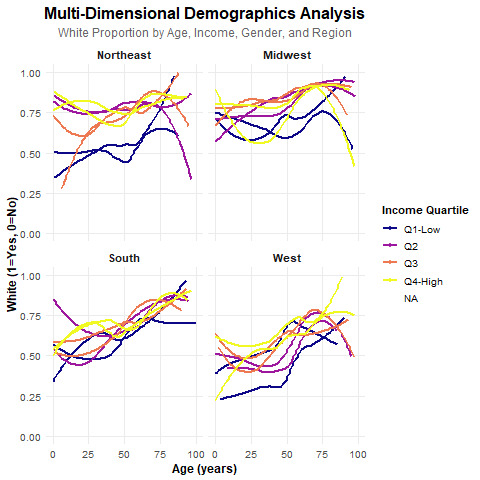

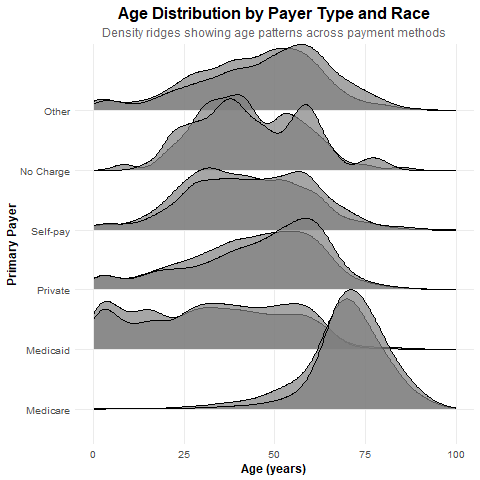

RInterpreterError: Failed to parse and evaluate line '\n# Interactive Demographics Dashboard\ncat("=== CREATING INTERACTIVE DEMOGRAPHICS DASHBOARD ===\\n")\n\nif(exists("NASS_SANDBOX") && require("ggplot2", quietly = TRUE)) {\n\n  # ===== PLOT 1: Multi-dimensional Demographics =====\n  if(all(c("AGE", "WHITE", "FEMALE", "ZIPINC_QRTL", "HOSP_REGION") %in% names(NASS_SANDBOX))) {\n\n    # Prepare data for plotting\n    plot_data <- NASS_SANDBOX[!is.na(AGE) & !is.na(WHITE) & !is.na(FEMALE) & \n                             !is.na(ZIPINC_QRTL) & !is.na(HOSP_REGION)]\n\n    # Sample data if too large (for performance)\n    if(nrow(plot_data) > 10000) {\n      set.seed(42)\n      plot_data <- plot_data[sample(.N, 10000)]\n      cat("Sampled 10,000 observations for plotting\\n")\n    }\n\n    # Create income labels\n    plot_data[, INCOME_LABEL := factor(ZIPINC_QRTL, \n                                      levels = 1:4, \n                                      labels = c("Q1-Low", "Q2", "Q3", "Q4-High"))]\n\n    # Create region labels\n    plot_data[, REGION_LABEL := factor(HOSP_REGION,\n                                      levels = 1:4,\n                                      labels = c("Northeast", "Midwest", "South", "West"))]\n\n    p1 <- ggplot(plot_data, aes(x = AGE, y = as.numeric(WHITE), \n                               color = INCOME_LABEL, shape = factor(FEMALE))) +\n      geom_point(alpha = 0.6, size = 1.5) +\n      geom_smooth(method = "loess", se = FALSE, linewidth = 1) +\n      facet_wrap(~REGION_LABEL, ncol = 2) +\n      theme_advanced +\n      labs(\n        title = "Multi-Dimensional Demographics Analysis",\n        subtitle = "White Proportion by Age, Income, Gender, and Region",\n        x = "Age (years)",\n        y = "White (1=Yes, 0=No)",\n        color = "Income Quartile",\n        shape = "Gender"\n      ) +\n      scale_color_viridis_d(option = "plasma") +\n      scale_shape_manual(values = c("0" = 16, "1" = 17), \n                        labels = c("Male", "Female")) +\n      ylim(0, 1)\n\n    print(p1)\n    cat("Multi-dimensional demographics plot created\\n")\n  }\n\n  # ===== PLOT 2: Ridge Plot for Age Distributions =====\n  if(require("ggridges", quietly = TRUE) && \n     all(c("AGE", "PAY1", "WHITE") %in% names(NASS_SANDBOX))) {\n\n    # Prepare data\n    ridge_data <- NASS_SANDBOX[!is.na(AGE) & !is.na(PAY1) & PAY1 %in% 1:6]\n\n    # Create payer labels\n    ridge_data[, PAYER_LABEL := factor(PAY1,\n                                      levels = 1:6,\n                                      labels = c("Medicare", "Medicaid", "Private", \n                                               "Self-pay", "No Charge", "Other"))]\n\n    p2 <- ggplot(ridge_data, aes(x = AGE, y = PAYER_LABEL, fill = factor(WHITE))) +\n      geom_density_ridges(alpha = 0.7, scale = 2) +\n      theme_advanced +\n      labs(\n        title = "Age Distribution by Payer Type and Race",\n        subtitle = "Density ridges showing age patterns across payment methods",\n        x = "Age (years)",\n        y = "Primary Payer",\n        fill = "Race"\n      ) +\n      scale_fill_manual(values = c("0" = "#E31A1C", "1" = "#1F78B4"),\n                       labels = c("Non-White", "White")) +\n      xlim(0, 100)\n\n    print(p2)\n    cat("Ridge plot for age distributions created\\n")\n  }\n\n  # ===== PLOT 3: Correlation Heatmap =====\n  if(require("corrplot", quietly = TRUE)) {\n\n    # Select numeric variables for correlation\n    numeric_vars <- c("AGE", "WHITE", "FEMALE", "ZIPINC_QRTL", "PAY1", \n                     "HOSP_LOCATION", "HOSP_TEACH", "HOSP_REGION")\n    available_numeric <- numeric_vars[numeric_vars %in% names(NASS_SANDBOX)]\n\n    if(length(available_numeric) >= 3) {\n      cor_data <- NASS_SANDBOX[, ..available_numeric]\n      cor_data <- cor_data[complete.cases(cor_data)]\n\n      # Convert logical to numeric\n      for(col in names(cor_data)) {\n        if(is.logical(cor_data[[col]])) {\n          cor_data[, (col) := as.numeric(get(col))]\n        }\n      }\n\n      cor_matrix <- cor(cor_data, use = "complete.obs")\n\n      # Create correlation plot\n      par(mfrow = c(1, 1))\n      corrplot(cor_matrix, \n               method = "color",\n               type = "upper", \n               order = "hclust",\n               col = colorRampPalette(c("#E31A1C", "white", "#1F78B4"))(100),\n               tl.cex = 0.8,\n               tl.col = "black",\n               addCoef.col = "black",\n               number.cex = 0.7,\n               title = "Variable Correlation Matrix")\n\n      cat("Correlation heatmap created\\n")\n    }\n  }\n\n} else {\n  cat("❌ Required data or packages not available for visualization\\n")\n}\n\ncat("\\n=== INTERACTIVE DASHBOARD COMPLETE ===\\n")\n'.
R error message: 'Error in cor(cor_data, use = "complete.obs") : \'x\' must be numeric'
R stdout:
Picking joint bandwidth of 3.01
Error in cor(cor_data, use = "complete.obs") : 'x' must be numeric
In addition: Warning messages:
1: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
2: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
3: No shared levels found between `names(values)` of the manual scale and the
data's shape values. 
4: Removed 10000 rows containing missing values or values outside the scale range
(`geom_point()`). 
5: Removed 199 rows containing missing values or values outside the scale range
(`geom_smooth()`). 
6: Removed 11 rows containing non-finite outside the scale range
(`stat_density_ridges()`). 
7: No shared levels found between `names(values)` of the manual scale and the
data's fill values. 
8: No shared levels found between `names(values)` of the manual scale and the
data's fill values.

In [18]:
%%R

# Interactive Demographics Dashboard
cat("=== CREATING INTERACTIVE DEMOGRAPHICS DASHBOARD ===\n")

if(exists("NASS_SANDBOX") && require("ggplot2", quietly = TRUE)) {
  
  # ===== PLOT 1: Multi-dimensional Demographics =====
  if(all(c("AGE", "WHITE", "FEMALE", "ZIPINC_QRTL", "HOSP_REGION") %in% names(NASS_SANDBOX))) {
    
    # Prepare data for plotting
    plot_data <- NASS_SANDBOX[!is.na(AGE) & !is.na(WHITE) & !is.na(FEMALE) & 
                             !is.na(ZIPINC_QRTL) & !is.na(HOSP_REGION)]
    
    # Sample data if too large (for performance)
    if(nrow(plot_data) > 10000) {
      set.seed(42)
      plot_data <- plot_data[sample(.N, 10000)]
      cat("Sampled 10,000 observations for plotting\n")
    }
    
    # Create income labels
    plot_data[, INCOME_LABEL := factor(ZIPINC_QRTL, 
                                      levels = 1:4, 
                                      labels = c("Q1-Low", "Q2", "Q3", "Q4-High"))]
    
    # Create region labels
    plot_data[, REGION_LABEL := factor(HOSP_REGION,
                                      levels = 1:4,
                                      labels = c("Northeast", "Midwest", "South", "West"))]
    
    p1 <- ggplot(plot_data, aes(x = AGE, y = as.numeric(WHITE), 
                               color = INCOME_LABEL, shape = factor(FEMALE))) +
      geom_point(alpha = 0.6, size = 1.5) +
      geom_smooth(method = "loess", se = FALSE, linewidth = 1) +
      facet_wrap(~REGION_LABEL, ncol = 2) +
      theme_advanced +
      labs(
        title = "Multi-Dimensional Demographics Analysis",
        subtitle = "White Proportion by Age, Income, Gender, and Region",
        x = "Age (years)",
        y = "White (1=Yes, 0=No)",
        color = "Income Quartile",
        shape = "Gender"
      ) +
      scale_color_viridis_d(option = "plasma") +
      scale_shape_manual(values = c("0" = 16, "1" = 17), 
                        labels = c("Male", "Female")) +
      ylim(0, 1)
    
    print(p1)
    cat("Multi-dimensional demographics plot created\n")
  }
  
  # ===== PLOT 2: Ridge Plot for Age Distributions =====
  if(require("ggridges", quietly = TRUE) && 
     all(c("AGE", "PAY1", "WHITE") %in% names(NASS_SANDBOX))) {
    
    # Prepare data
    ridge_data <- NASS_SANDBOX[!is.na(AGE) & !is.na(PAY1) & PAY1 %in% 1:6]
    
    # Create payer labels
    ridge_data[, PAYER_LABEL := factor(PAY1,
                                      levels = 1:6,
                                      labels = c("Medicare", "Medicaid", "Private", 
                                               "Self-pay", "No Charge", "Other"))]
    
    p2 <- ggplot(ridge_data, aes(x = AGE, y = PAYER_LABEL, fill = factor(WHITE))) +
      geom_density_ridges(alpha = 0.7, scale = 2) +
      theme_advanced +
      labs(
        title = "Age Distribution by Payer Type and Race",
        subtitle = "Density ridges showing age patterns across payment methods",
        x = "Age (years)",
        y = "Primary Payer",
        fill = "Race"
      ) +
      scale_fill_manual(values = c("0" = "#E31A1C", "1" = "#1F78B4"),
                       labels = c("Non-White", "White")) +
      xlim(0, 100)
    
    print(p2)
    cat("Ridge plot for age distributions created\n")
  }
  
  # ===== PLOT 3: Correlation Heatmap =====
  if(require("corrplot", quietly = TRUE)) {
    
    # Select numeric variables for correlation
    numeric_vars <- c("AGE", "WHITE", "FEMALE", "ZIPINC_QRTL", "PAY1", 
                     "HOSP_LOCATION", "HOSP_TEACH", "HOSP_REGION")
    available_numeric <- numeric_vars[numeric_vars %in% names(NASS_SANDBOX)]
    
    if(length(available_numeric) >= 3) {
      cor_data <- NASS_SANDBOX[, ..available_numeric]
      cor_data <- cor_data[complete.cases(cor_data)]
      
      # Convert logical to numeric
      for(col in names(cor_data)) {
        if(is.logical(cor_data[[col]])) {
          cor_data[, (col) := as.numeric(get(col))]
        }
      }
      
      cor_matrix <- cor(cor_data, use = "complete.obs")
      
      # Create correlation plot
      par(mfrow = c(1, 1))
      corrplot(cor_matrix, 
               method = "color",
               type = "upper", 
               order = "hclust",
               col = colorRampPalette(c("#E31A1C", "white", "#1F78B4"))(100),
               tl.cex = 0.8,
               tl.col = "black",
               addCoef.col = "black",
               number.cex = 0.7,
               title = "Variable Correlation Matrix")
      
      cat("Correlation heatmap created\n")
    }
  }
  
} else {
  cat("❌ Required data or packages not available for visualization\n")
}

cat("\n=== INTERACTIVE DASHBOARD COMPLETE ===\n")

## Procedure-Specific Visualizations

Advanced visualizations focusing on surgical procedures and utilization patterns.

=== PROCEDURE-SPECIFIC VISUALIZATIONS ===
Analyzing topAnalyzing top 10 procedures
 10 procedures
Alluvial diagram created
Alluvial diagram created
Age distribution by procedure created
Age distribution by procedure created
Procedure complexity heatmap created

=== PROCEDURE VISUALIZATIONS COMPLETE ===
Procedure complexity heatmap created

=== PROCEDURE VISUALIZATIONS COMPLETE ===


In addition: Warning message:
Removed 2 rows containing non-finite outside the scale range
(`stat_density()`). 


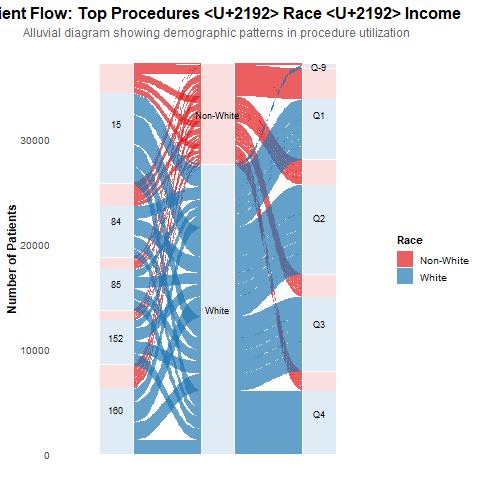

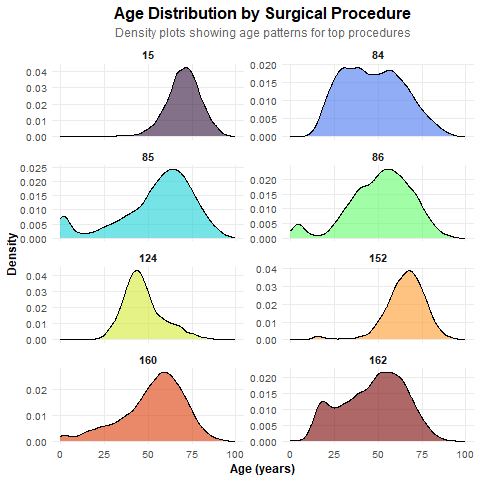

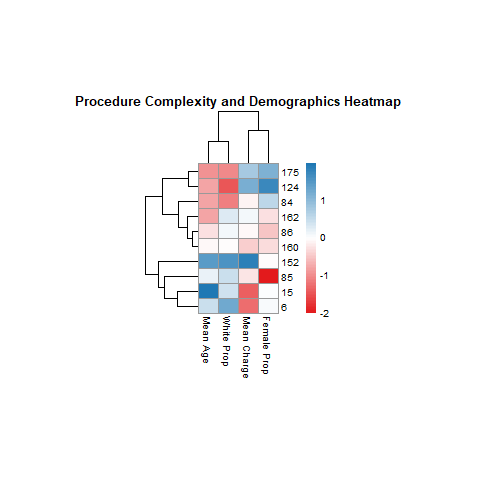

In [19]:
%%R

# Procedure-Specific Advanced Visualizations
cat("=== PROCEDURE-SPECIFIC VISUALIZATIONS ===\n")

if(exists("NASS_SANDBOX") && all(c("CPTCCS1", "WHITE", "AGE", "ZIPINC_QRTL") %in% names(NASS_SANDBOX))) {
  
  # ===== Top Procedures Analysis =====
  top_procedures <- NASS_SANDBOX[, .N, by = CPTCCS1][order(-N)][1:10]
  cat("Analyzing top", nrow(top_procedures), "procedures\n")
  
  # Filter data for top procedures
  proc_data <- NASS_SANDBOX[CPTCCS1 %in% top_procedures$CPTCCS1]
  
  # ===== PLOT 1: Procedure Utilization by Demographics =====
  if(require("ggalluvial", quietly = TRUE)) {
    
    # Prepare alluvial data
    alluvial_data <- proc_data[!is.na(WHITE) & !is.na(ZIPINC_QRTL), 
                              .(count = .N),
                              by = .(CPTCCS1, WHITE, ZIPINC_QRTL)]
    
    # Filter to top 5 procedures for readability
    top5_procs <- top_procedures$CPTCCS1[1:5]
    alluvial_data <- alluvial_data[CPTCCS1 %in% top5_procs]
    
    # Create labels
    alluvial_data[, RACE_LABEL := ifelse(WHITE == 1, "White", "Non-White")]
    alluvial_data[, INCOME_LABEL := paste0("Q", ZIPINC_QRTL)]
    
    p3 <- ggplot(alluvial_data, 
                aes(axis1 = CPTCCS1, axis2 = RACE_LABEL, axis3 = INCOME_LABEL, y = count)) +
      geom_alluvium(aes(fill = RACE_LABEL), alpha = 0.7) +
      geom_stratum(alpha = 0.8, color = "white") +
      geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
      theme_advanced +
      theme(axis.text.x = element_blank(),
            axis.ticks.x = element_blank(),
            panel.grid = element_blank()) +
      labs(
        title = "Patient Flow: Top Procedures → Race → Income",
        subtitle = "Alluvial diagram showing demographic patterns in procedure utilization",
        y = "Number of Patients",
        fill = "Race"
      ) +
      scale_x_discrete(limits = c("Procedure", "Race", "Income Quartile")) +
      scale_fill_manual(values = c("Non-White" = "#E31A1C", "White" = "#1F78B4"))
    
    print(p3)
    cat("Alluvial diagram created\n")
  }
  
  # ===== PLOT 2: Age Distribution by Procedure =====
  p4 <- ggplot(proc_data[CPTCCS1 %in% top_procedures$CPTCCS1[1:8]], 
              aes(x = AGE, fill = factor(CPTCCS1))) +
    geom_density(alpha = 0.6) +
    facet_wrap(~CPTCCS1, scales = "free_y", ncol = 2) +
    theme_advanced +
    theme(legend.position = "none") +
    labs(
      title = "Age Distribution by Surgical Procedure",
      subtitle = "Density plots showing age patterns for top procedures",
      x = "Age (years)",
      y = "Density"
    ) +
    scale_fill_viridis_d(option = "turbo") +
    xlim(0, 100)
  
  print(p4)
  cat("Age distribution by procedure created\n")
  
  # ===== PLOT 3: Procedure Complexity Heatmap =====
  if(require("pheatmap", quietly = TRUE) && "TOTCHG" %in% names(NASS_SANDBOX)) {
    
    # Calculate procedure complexity metrics
    complexity_data <- proc_data[!is.na(TOTCHG) & TOTCHG > 0, 
                                .(mean_age = mean(AGE, na.rm = TRUE),
                                  mean_charge = mean(TOTCHG, na.rm = TRUE),
                                  white_prop = mean(WHITE, na.rm = TRUE),
                                  female_prop = mean(as.numeric(FEMALE), na.rm = TRUE),
                                  count = .N),
                                by = CPTCCS1]
    
    # Filter for procedures with sufficient volume
    complexity_data <- complexity_data[count >= 50]
    
    if(nrow(complexity_data) >= 3) {
      # Prepare matrix for heatmap
      heatmap_matrix <- as.matrix(complexity_data[, .(mean_age, mean_charge, white_prop, female_prop)])
      rownames(heatmap_matrix) <- complexity_data$CPTCCS1
      colnames(heatmap_matrix) <- c("Mean Age", "Mean Charge", "White Prop", "Female Prop")
      
      # Scale the data
      heatmap_matrix_scaled <- scale(heatmap_matrix)
      
      # Create heatmap
      pheatmap(heatmap_matrix_scaled,
               main = "Procedure Complexity and Demographics Heatmap",
               color = colorRampPalette(c("#E31A1C", "white", "#1F78B4"))(100),
               cellwidth = 20,
               cellheight = 15,
               fontsize = 10)
      
      cat("Procedure complexity heatmap created\n")
    }
  }
  
} else {
  cat("❌ Required procedure data not available\n")
}

cat("\n=== PROCEDURE VISUALIZATIONS COMPLETE ===\n")

# 5. Machine Learning Pipeline Development

Build and test machine learning models for predicting ambulatory surgery usage patterns using demographic and socioeconomic variables.

## Machine Learning Package Setup

Install and configure machine learning libraries for both Python and R.

In [20]:
# Install Python ML packages
ml_packages = ['scikit-learn', 'xgboost', 'lightgbm', 'shap']

for pkg in ml_packages:
    try:
        __import__(pkg.replace('-', '_'))
        print(f"✅ {pkg} available")
    except ImportError:
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])
        print(f"✅ {pkg} installed")

# Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

print("✅ Python ML environment ready")

Installing scikit-learn...
✅ scikit-learn installed
Installing xgboost...
✅ scikit-learn installed
Installing xgboost...


KeyboardInterrupt: 

In [ ]:
%%R

# R Machine Learning packages
ml_r_packages <- c(
  "randomForest",   # Random Forest
  "caret",          # ML framework
  "xgboost",        # Gradient boosting
  "pROC",           # ROC analysis
  "ROCR",           # ROC curves
  "e1071",          # SVM
  "glmnet"          # Regularized regression
)

cat("Setting up R machine learning packages...\n")

for(pkg in ml_r_packages) {
  if(!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat("Installing", pkg, "...\n")
    tryCatch({
      install.packages(pkg, quiet = TRUE, dependencies = TRUE)
      library(pkg, character.only = TRUE, quietly = TRUE)
      cat("✅", pkg, "ready\n")
    }, error = function(e) {
      cat("⚠️", pkg, "installation failed\n")
    })
  } else {
    cat("✅", pkg, "ready\n")
  }
}

cat("R ML environment setup complete\n")

## Feature Engineering and Data Preparation

Prepare features for machine learning models.

In [ ]:
# Feature Engineering for ML
if df_sandbox is not None:
    print("=== FEATURE ENGINEERING FOR MACHINE LEARNING ===")
    
    # Create ML dataset
    ml_data = df_sandbox.copy()
    
    # Target variable: WHITE (race prediction)
    if 'WHITE' in ml_data.columns:
        target_col = 'WHITE'
        print(f"Target variable: {target_col}")
        print(f"Target distribution: {ml_data[target_col].value_counts().to_dict()}")
    else:
        print("❌ Target variable WHITE not found")
        target_col = None
    
    if target_col:
        # Feature selection
        feature_cols = [
            'AGE', 'FEMALE', 'ZIPINC_QRTL', 'PAY1',
            'HOSP_LOCATION', 'HOSP_TEACH', 'HOSP_REGION'
        ]
        
        # Check which features are available
        available_features = [col for col in feature_cols if col in ml_data.columns]
        print(f"Available features: {available_features}")
        
        if len(available_features) >= 3:
            # Create feature matrix
            X = ml_data[available_features].copy()
            y = ml_data[target_col].copy()
            
            # Handle missing values
            X = X.fillna(X.median() if X.dtypes.name in ['int64', 'float64'] else X.mode().iloc[0])
            
            # Convert categorical variables
            categorical_cols = X.select_dtypes(include=['object']).columns
            for col in categorical_cols:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col].astype(str))
            
            # Ensure all columns are numeric
            for col in X.columns:
                X[col] = pd.to_numeric(X[col], errors='coerce')
            X = X.fillna(0)
            
            # Remove any remaining missing values in target
            valid_idx = ~y.isna()
            X = X[valid_idx]
            y = y[valid_idx]
            
            print(f"Final dataset shape: {X.shape}")
            print(f"Features: {list(X.columns)}")
            
            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42, stratify=y
            )
            
            print(f"Training set: {X_train.shape}")
            print(f"Test set: {X_test.shape}")
            
            # Store for R analysis
            globals()['X_train'] = X_train
            globals()['X_test'] = X_test
            globals()['y_train'] = y_train
            globals()['y_test'] = y_test
            
        else:
            print("❌ Insufficient features available")
    
else:
    print("❌ No data available for feature engineering")

## Python Machine Learning Models

Build and evaluate multiple ML models using Python.

In [ ]:
# Python Machine Learning Pipeline
if 'X_train' in globals():
    print("=== PYTHON MACHINE LEARNING MODELS ===")
    
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    # Scale features for logistic regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    results = {}
    
    for name, model in models.items():
        print(f"\n--- {name} ---")
        
        try:
            # Use scaled data for logistic regression, original for tree-based
            if 'Logistic' in name:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
                y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
            else:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Evaluate model
            accuracy = model.score(X_test_scaled if 'Logistic' in name else X_test, y_test)
            auc_score = roc_auc_score(y_test, y_pred_proba)
            
            print(f"Accuracy: {accuracy:.3f}")
            print(f"AUC Score: {auc_score:.3f}")
            
            # Classification report
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))
            
            # Feature importance (for tree-based models)
            if hasattr(model, 'feature_importances_'):
                feature_importance = pd.DataFrame({
                    'feature': X_train.columns,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                print("\nTop Feature Importances:")
                print(feature_importance.head())
            
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'auc': auc_score,
                'predictions': y_pred_proba
            }
            
        except Exception as e:
            print(f"❌ Model {name} failed: {e}")
    
    # Compare models
    if results:
        print("\n=== MODEL COMPARISON ===")
        comparison = pd.DataFrame({
            name: {'Accuracy': res['accuracy'], 'AUC': res['auc']}
            for name, res in results.items()
        }).T
        
        print(comparison.round(3))
        
        # Best model
        best_model_name = comparison['AUC'].idxmax()
        print(f"\nBest model by AUC: {best_model_name}")
        
        # Store best model results
        globals()['best_model_results'] = results[best_model_name]
        globals()['model_comparison'] = comparison
    
else:
    print("❌ Training data not available")

## R Machine Learning Analysis

Complement Python analysis with R-based ML approaches, including survey-weighted models.

In [ ]:
%%R -i X_train -i X_test -i y_train -i y_test

# R Machine Learning Analysis
cat("=== R MACHINE LEARNING ANALYSIS ===\n")

if(exists("X_train") && require("randomForest", quietly = TRUE) && require("caret", quietly = TRUE)) {
  
  # Prepare data for R analysis
  train_data <- data.frame(X_train, target = y_train)
  test_data <- data.frame(X_test, target = y_test)
  
  cat("R ML data prepared:\n")
  cat("Training:", nrow(train_data), "x", ncol(train_data), "\n")
  cat("Testing:", nrow(test_data), "x", ncol(test_data), "\n")
  
  # ===== MODEL 1: Random Forest with caret =====
  cat("\n--- Random Forest (caret framework) ---\n")
  
  tryCatch({
    # Set up cross-validation
    ctrl <- trainControl(method = "cv", number = 5, 
                        summaryFunction = twoClassSummary,
                        classProbs = TRUE)
    
    # Convert target to factor with proper levels for caret
    train_data$target <- factor(ifelse(train_data$target == 1, "White", "NonWhite"))
    test_data$target <- factor(ifelse(test_data$target == 1, "White", "NonWhite"))
    
    # Train random forest
    rf_model <- train(target ~ ., 
                     data = train_data,
                     method = "rf",
                     trControl = ctrl,
                     metric = "ROC",
                     ntree = 100)
    
    cat("Random Forest model trained successfully\n")
    print(rf_model)
    
    # Make predictions
    rf_pred <- predict(rf_model, test_data, type = "prob")
    rf_pred_class <- predict(rf_model, test_data)
    
    # Calculate AUC
    if(require("pROC", quietly = TRUE)) {
      roc_obj <- roc(test_data$target, rf_pred$White)
      auc_score <- auc(roc_obj)
      cat("AUC Score:", round(auc_score, 3), "\n")
    }
    
    # Feature importance
    importance <- varImp(rf_model)
    cat("\nFeature Importance:\n")
    print(importance)
    
  }, error = function(e) {
    cat("Random Forest failed:", e$message, "\n")
  })
  
  # ===== MODEL 2: Survey-Weighted Analysis =====
  if("DISCWT" %in% names(NASS_SANDBOX) && require("survey", quietly = TRUE)) {
    cat("\n--- Survey-Weighted Logistic Regression ---\n")
    
    tryCatch({
      # Prepare survey data
      survey_data <- NASS_SANDBOX[!is.na(WHITE) & !is.na(AGE) & !is.na(FEMALE) & 
                                 !is.na(ZIPINC_QRTL) & !is.na(DISCWT)]
      
      # Create survey design
      survey_design <- svydesign(ids = ~1, weights = ~DISCWT, data = survey_data)
      
      # Fit survey-weighted model
      survey_model <- svyglm(WHITE ~ AGE + FEMALE + ZIPINC_QRTL + PAY1 + 
                            HOSP_LOCATION + HOSP_TEACH + HOSP_REGION,
                            design = survey_design,
                            family = binomial())
      
      cat("Survey-weighted model fitted\n")
      print(summary(survey_model))
      
      # Pseudo R-squared for survey models
      if(require("survey", quietly = TRUE)) {
        psrsq <- psrsq(survey_model)
        cat("Pseudo R-squared:", round(psrsq, 3), "\n")
      }
      
    }, error = function(e) {
      cat("Survey-weighted model failed:", e$message, "\n")
    })
  }
  
  # ===== MODEL 3: Regularized Regression =====
  if(require("glmnet", quietly = TRUE)) {
    cat("\n--- Regularized Logistic Regression (glmnet) ---\n")
    
    tryCatch({
      # Prepare matrices for glmnet
      X_matrix <- as.matrix(X_train)
      y_vector <- as.numeric(y_train)
      
      # Fit elastic net with cross-validation
      cv_fit <- cv.glmnet(X_matrix, y_vector, family = "binomial", 
                         alpha = 0.5, nfolds = 5)
      
      cat("Elastic net model fitted\n")
      cat("Best lambda:", round(cv_fit$lambda.min, 4), "\n")
      cat("CV AUC:", round(max(cv_fit$cvm), 3), "\n")
      
      # Coefficients at best lambda
      coef_best <- coef(cv_fit, s = "lambda.min")
      cat("\nNon-zero coefficients:\n")
      print(coef_best[coef_best[,1] != 0, , drop = FALSE])
      
      # Predictions on test set
      X_test_matrix <- as.matrix(X_test)
      pred_probs <- predict(cv_fit, X_test_matrix, s = "lambda.min", type = "response")
      
      # Calculate test AUC
      if(require("pROC", quietly = TRUE)) {
        test_roc <- roc(y_test, as.numeric(pred_probs))
        test_auc <- auc(test_roc)
        cat("Test AUC:", round(test_auc, 3), "\n")
      }
      
    }, error = function(e) {
      cat("Regularized regression failed:", e$message, "\n")
    })
  }
  
} else {
  cat("❌ Required data or packages not available for R ML analysis\n")
}

cat("\n=== R MACHINE LEARNING COMPLETE ===\n")

## Model Interpretation and Visualization

Create interpretable visualizations of model performance and feature importance.

In [ ]:
# Model Interpretation and Visualization
if 'best_model_results' in globals() and PYTHON_VIZ_AVAILABLE:
    print("=== MODEL INTERPRETATION AND VISUALIZATION ===")
    
    # ROC Curves Comparison
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: ROC Curves
    plt.subplot(1, 2, 1)
    
    for name, result in globals().get('results', {}).items():
        if 'predictions' in result:
            fpr, tpr, _ = roc_curve(y_test, result['predictions'])
            plt.plot(fpr, tpr, label=f"{name} (AUC={result['auc']:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Feature Importance (if available)
    plt.subplot(1, 2, 2)
    
    best_model = best_model_results['model']
    if hasattr(best_model, 'feature_importances_'):
        feature_names = X_train.columns
        importances = best_model.feature_importances_
        
        # Sort features by importance
        indices = np.argsort(importances)[::-1]
        
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.title('Feature Importance')
        plt.ylabel('Importance')
    else:
        plt.text(0.5, 0.5, 'Feature importance\nnot available', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Feature Importance')
    
    plt.tight_layout()
    plt.show()
    
    # Performance Summary
    print("\n=== FINAL MODEL PERFORMANCE SUMMARY ===")
    if 'model_comparison' in globals():
        print("Model Performance Comparison:")
        print(globals()['model_comparison'].round(3))
    
    print(f"\nBest Model: {best_model_results}")
    
else:
    print("❌ Model results not available for interpretation")

# 6. Additional Census Comparisons

Extend Census API integration to include additional demographic variables and perform comprehensive population-level comparisons.

## Extended Census Variables

Retrieve additional demographic variables from Census API for comprehensive comparison.